In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score,mean_absolute_error

Data Loading and Preprocessing

In [2]:
#Reading calories.csv
calories = pd.read_csv(r'C:\Users\ajayk\Downloads\CALORIES_BURNT-20231015T155831Z-001\CALORIES_BURNT\Dataset\calories.csv')

In [3]:
calories


,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0
...,...,...
14995,15644082,45.0
14996,17212577,23.0
14997,17271188,75.0
14998,18643037,11.0


In [4]:
#Reading exercise.csv
exercise_data = pd.read_csv(r'C:\Users\ajayk\Downloads\CALORIES_BURNT-20231015T155831Z-001\CALORIES_BURNT\Dataset\exercise.csv')

In [5]:
exercise_data


,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3


Combining Data Frames

In [6]:
calories_data = pd.concat([exercise_data, calories['Calories']], axis=1)

In [7]:
calories_data

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0


In [8]:
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


Checking for null values

In [9]:
calories_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

Description of the dataset:

In [10]:
calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


Data Visualization

In [11]:
#setting up the sns plot:
sns.set()

visualizing the age column.

C:\Users\ajayk\AppData\Local\Temp\ipykernel_14680\4143415435.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Age'])


<Axes: xlabel='Age', ylabel='Density'>

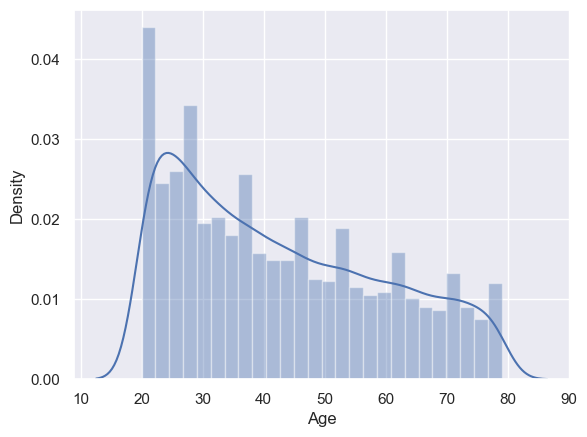

In [12]:
#finding the distribution of "Age" column
sns.distplot(calories_data['Age'])


Visualizing Height column.

C:\Users\ajayk\AppData\Local\Temp\ipykernel_14680\178982985.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Height'])


<Axes: xlabel='Height', ylabel='Density'>

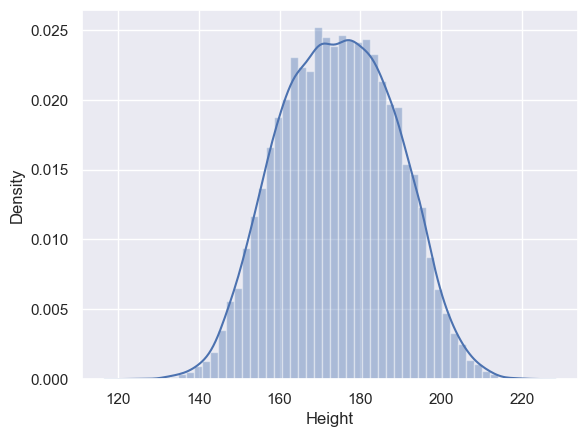

In [13]:
#finding the distribution of "Height" column
sns.distplot(calories_data['Height'])

Let's find the correlation between features.

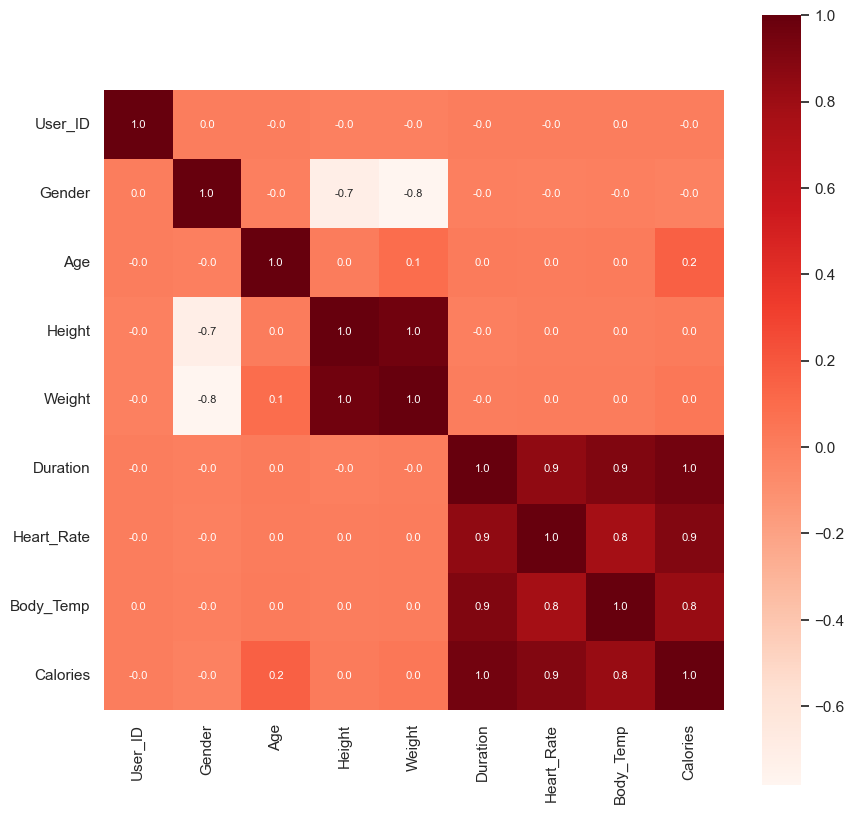

In [16]:
correlation = calories_data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Reds')
plt.show()

Converting gender column to integer.


In [15]:
calories_data.replace({"Gender":{'male':0,'female':1}}, inplace=True)

In [17]:
calories_data

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,1,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,1,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,1,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,0,78,193.0,97.0,2.0,84.0,38.3,11.0


Splitting data into train and test sets

In [18]:
X=calories_data.drop(columns=['User_ID','Calories','Weight'], axis=1)
Y=calories_data['Calories']

In [19]:
X

,Gender,Age,Height,Duration,Heart_Rate,Body_Temp
0,0,68,190.0,29.0,105.0,40.8
1,1,20,166.0,14.0,94.0,40.3
2,0,69,179.0,5.0,88.0,38.7
3,1,34,179.0,13.0,100.0,40.5
4,1,27,154.0,10.0,81.0,39.8
...,...,...,...,...,...,...
14995,1,20,193.0,11.0,92.0,40.4
14996,1,27,165.0,6.0,85.0,39.2
14997,1,43,159.0,16.0,90.0,40.1
14998,0,78,193.0,2.0,84.0,38.3


In [20]:
Y

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [22]:
print(X.shape, X_train.shape, X_test.shape)

(15000, 6) (12000, 6) (3000, 6)


Model Training

Model-1: Linear Regression

In [23]:
#Loading model:
model = LinearRegression()

In [24]:
#Training and calculating the accuracy
model.fit(X_train, Y_train)

LinearRegression()

In [25]:
test_data_prediction = model.predict(X_test)

In [26]:
print(test_data_prediction)

[136.13750038 181.1106889   51.22849358 ... 157.10316595  17.48925282
 101.38944265]


In [27]:
mae= metrics.mean_absolute_error(Y_test, test_data_prediction)

In [28]:
print("Mean Absolute Error = ", mae)

Mean Absolute Error =  8.398683417976244


In [29]:
print(r2_score(Y_test,test_data_prediction))

0.966701917377289


Accuraccuracy is near 96%.                              
Mean Absolute Error is near 8.3

Model-2: Random Forest Regressor

In [30]:
#Loading model:
model = RandomForestRegressor()

In [31]:
#Training and calculating the accuracy
model.fit(X_train, Y_train)

RandomForestRegressor()

In [32]:
test_data_prediction = model.predict(X_test)

In [33]:
mae = metrics.mean_absolute_error(Y_test, test_data_prediction)

In [34]:
print("Mean Absolute Error = ", mae)

Mean Absolute Error =  1.8552191111111112


In [35]:
print(r2_score(Y_test, test_data_prediction))

0.9979439202694754


Accuracy is Somewhere around                           99%.

Mean Absolute Error is near 1.85

Model-3:XGBRegressor

In [36]:
#Loading Model:
model = XGBRegressor()

In [37]:
#Training and calculating the accuracy
model.fit(X_train, Y_train)

c:\Users\ajayk\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\ajayk\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\ajayk\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\ajayk\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version.

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [38]:
test_data_prediction = model.predict(X_test)

c:\Users\ajayk\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\ajayk\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\ajayk\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\ajayk\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version.

In [39]:
mae = metrics.mean_absolute_error(Y_test, test_data_prediction)

In [40]:
print("Mean Absolute Error = ", mae)

Mean Absolute Error =  1.620836253573497


In [41]:
print(r2_score(Y_test,test_data_prediction))

0.9985399964803907


Accuracy is Somewhere around
99%.

Mean Absolute Error is 1.62

Model Deployment

In [44]:
import pickle

In [45]:
pickle.dump(model,open(r'C:\Users\ajayk\Downloads\CALORIES_BURNT-20231015T155831Z-001\CALORIES_BURNT\Model\model.pkl','wb'))
